<a href="https://colab.research.google.com/github/ABHIRAM199/Gen-AI/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BERT (Bidirectional Encoder Representations from Transformers)**

## **Agenda**

* **Introduction to BERT**
* **Understanding Transformers**
* **Pre-training and Fine-tuning**
* **BERT Architecture**
* **Tokenization**
* **Fine-tuning BERT for Text Classification**
* **Fine-tuning BERT for Named Entity Recognition (NER)**
* **Fine-tuning BERT for Question Answering**
* **BERT Variants and Extensions**


# **Introduction to BERT**

- BERT, which stands for Bidirectional Encoder Representations from Transformers, is a state-of-the-art language representation model developed by Google in 2018. It has significantly advanced the field of Natural Language Processing (NLP) by enabling better understanding and generation of human language.


 **Key Features of BERT:**

- **Bidirectional Training:** Unlike previous models that read text input sequentially (left-to-right or right-to-left), BERT reads text in both directions simultaneously, allowing it to understand the context of a word based on all of its surrounding words in a sentence.
- **Transformer Architecture:** BERT is built on the Transformer architecture, which uses self-attention mechanisms to process input data in parallel, making it highly efficient for training on large datasets.

 **Pre-training and Fine-tuning: BERT uses a two-step training process:**
- **Pre-training:** The model is trained on a large corpus of text in an unsupervised manner to learn general language representations.
- **Fine-tuning:** The pre-trained model is then fine-tuned on a specific task (e.g., text classification, named entity recognition) using a smaller, task-specific dataset.

**Key Differences:**
- **Sequential vs. Bidirectional Processing:** RNNs and LSTMs process text sequentially, which can limit their ability to capture context over long sentences. BERT's bidirectional approach captures context from both directions simultaneously.
- **Attention Mechanism:** While RNNs and LSTMs rely on hidden states to maintain context, BERT uses self-attention mechanisms to weigh the importance of different words in a sentence, providing a more robust context understanding.
- **Training Efficiency:** Transformer-based models like BERT can process data in parallel, making them more efficient to train on large datasets compared to the sequential nature of RNNs and LSTMs.

# **Understanding Transformers**

**Transformer Architecture:**
The Transformer architecture, introduced in the paper "Attention is All You Need" by Vaswani et al., revolutionized natural language processing (NLP) tasks. Unlike previous sequence models like RNNs and LSTMs, Transformers rely entirely on self-attention mechanisms.

**The core components of a Transformer include:**

- **Encoder:** Composed of a stack of identical layers, each containing two sub-layers:
- **Multi-Head Self-Attention Mechanism:** Allows the encoder to weigh the importance of each word in the input sequence.
- **Position-wise Fully Connected Feed-Forward Network:** Applies a non-linear transformation to each position separately and identically.
- **Decoder:** Similar to the encoder, but it has an additional multi-head self-attention sub-layer, which attends to the input sequence, allowing the model to focus on different parts during encoding and decoding.


### **Attention Mechanism:**
- Attention is a mechanism that enables the model to focus on relevant parts of the input when producing each part of the output. It assigns different weights to different input elements, highlighting their importance. The attention mechanism calculates these weights by comparing the similarity between the current input and each element in the sequence.

### **Encoder-Decoder Structure:**
- The Encoder-Decoder architecture is widely used in sequence-to-sequence tasks like machine translation. In this structure, the encoder processes the input sequence, producing a fixed-size representation (context vector), and the decoder generates the output sequence based on this representation. Transformers utilize this architecture but replace recurrent layers with self-attention mechanisms, allowing them to capture dependencies across the input and output sequences more effectively.

### **Self-Attention and Its Significance:**
- Self-attention is a mechanism that computes the representation of each word in a sequence by considering all other words in the sequence. It allows the model to weigh the importance of each word based on its relevance to other words in the sequence, capturing long-range dependencies efficiently. Self-attention is significant because it enables Transformers to process input sequences in parallel, unlike recurrent models that process inputs sequentially. This parallel processing capability makes Transformers faster and more scalable, allowing them to handle longer sequences with ease.

- In summary, Transformers leverage self-attention mechanisms within an encoder-decoder architecture to process sequences and generate outputs efficiently. This architecture has proven highly effective across various NLP tasks, achieving state-of-the-art results in tasks such as machine translation, text summarization, and language modeling.






# **Pre-training & Fine-tuning:**


### **1.** **Pre-training Objective:**
 To learn general language representations from a large corpus of unlabelled text data.

**Key Concepts:**
- **Bidirectional Context:** Unlike traditional models that process text in a unidirectional manner, BERT reads text in both directions (left-to-right and right-to-left), providing a deeper understanding of context.
 **Masked Language Modeling (MLM):**
- **Purpose:** To train the model to predict missing words in a sentence.
- **Process:** Randomly masks 15% of the words in the input and asks the model to predict these masked words based on the surrounding context.


**Next Sentence Prediction (NSP):**
- **Purpose:** To understand the relationship between two sentences.
- **Process:** The model is given pairs of sentences and must predict whether the second sentence follows the first one in the original text.

### **Visualization of Pre-training**

**Visualization of Pre-training:**
Since actual pre-training is computationally intensive, we'll simulate a simple pre-training process using masked language modeling on a small text dataset.

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/5, Loss: 12.1098
Epoch 2/5, Loss: 9.0845
Epoch 3/5, Loss: 7.6908
Epoch 4/5, Loss: 6.4109
Epoch 5/5, Loss: 5.4472


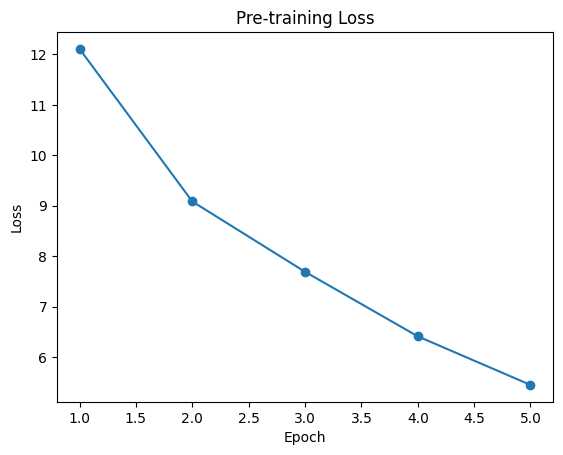

In [ ]:
import torch
from transformers import BertTokenizer, BertForMaskedLM, AdamW
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Sample dataset
class SimpleDataset(Dataset):
    def __init__(self, texts, tokenizer, max_len=32):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        inputs = self.tokenizer(text, return_tensors='pt', max_length=self.max_len, padding='max_length', truncation=True)
        inputs = {key: val.squeeze() for key, val in inputs.items()}
        inputs['labels'] = inputs['input_ids'].clone()

        # Mask 15% of the tokens
        rand = torch.rand(inputs['input_ids'].shape)
        mask_arr = (rand < 0.15) * (inputs['input_ids'] != self.tokenizer.cls_token_id) * (inputs['input_ids'] != self.tokenizer.sep_token_id)
        selection = torch.flatten(mask_arr.nonzero()).tolist()
        inputs['input_ids'][selection] = self.tokenizer.mask_token_id

        return inputs

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sample texts
texts = [
    "The quick brown fox jumps over the lazy dog.",
    "I love natural language processing.",
    "BERT is a powerful transformer model.",
    "Pre-training and fine-tuning are crucial steps."
]

# Create dataset and dataloader
dataset = SimpleDataset(texts, tokenizer)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Load pre-trained BERT model for masked language modeling
model = BertForMaskedLM.from_pretrained('bert-base-uncased')

# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training loop
epochs = 5
loss_values = []

model.train()
for epoch in range(epochs):
    total_loss = 0
    for batch in dataloader:
        optimizer.zero_grad()
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(dataloader)
    loss_values.append(avg_loss)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

# Plot training loss
plt.plot(range(1, epochs + 1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Pre-training Loss')
plt.show()


### **2. Fine-tuning Objective:**
 To adapt the pre-trained BERT model to specific downstream tasks using task-specific labeled datasets.


**Process:**
- Task-Specific Adaptation: The pre-trained BERT model is further trained on a smaller, task-specific dataset. This process fine-tunes the model's parameters to optimize performance on the target task.

**Example Tasks:**
- **Text Classification:** Categorizing a piece of text into predefined labels, such as sentiment analysis.
- **Named Entity Recognition (NER):** Identifying and classifying named entities (like names, dates, and locations) in a text.
- **Question Answering (QA):** Finding precise answers to questions from a given context.
- **Text Summarization:** Generating concise summaries of longer texts.



### **Steps in Fine-tuning:**
- **Input Preparation:** Convert the task-specific dataset into the required format. For instance, for a QA task, the dataset consists of question-context pairs with annotated answers.
- **Model Training:** The pre-trained BERT model is trained further on this labeled dataset. Typically, only a few epochs are needed due to the effectiveness of the pre-trained model.
- **Evaluation and Optimization:** The model's performance is evaluated on a validation set, and hyperparameters are tuned to improve accuracy.

# **BERT Architecture**

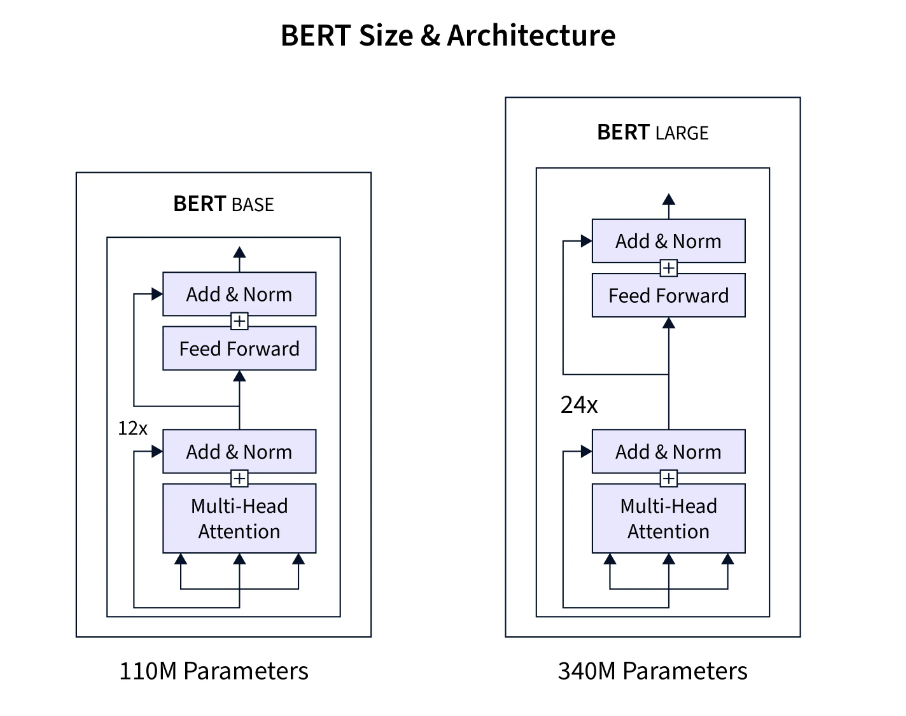

### **Simplified overview of the BERT architecture:**

- **Input Embeddings:** BERT takes tokenized input sequences, where each token is represented as a fixed-length vector called word embeddings. BERT uses WordPiece embeddings, which are able to represent a wide range of words and subwords.

- **Transformer Encoder:** BERT utilizes a multi-layer bidirectional Transformer encoder architecture. The Transformer encoder consists of a stack of multiple identical layers. Each layer has two sub-layers:

- **Multi-Head Self-Attention Mechanism:** This mechanism allows each word in the input sequence to attend to all other words, capturing the dependencies between words. BERT uses multi-head attention to attend to different positions within the input sequence.
Position-wise Fully Connected Feed-Forward Network: After self-attention, each position applies a fully connected feed-forward network independently.
Pre-training Tasks:

- **Masked Language Model (MLM):** BERT pre-trains using a MLM objective, where a certain percentage of the input tokens are randomly masked, and the model is trained to predict the original token using only the context provided by the unmasked tokens.
- **Next Sentence Prediction (NSP):** BERT also pre-trains using a NSP objective, where pairs of sentences are fed into the model, and the model learns to predict whether the second sentence follows the first sentence in the original document.
- **Fine-tuning:** After pre-training on large corpora, BERT can be fine-tuned on downstream tasks such as text classification, named entity recognition, question answering, etc. Fine-tuning involves training the model with task-specific labeled data to adapt its parameters for the specific task.

- **Output Layers:** BERT can output various representations based on the downstream task. For example, for sequence classification tasks, the final hidden state corresponding to the [CLS] token is often used as the input to a classification layer. For token-level tasks like named entity recognition, the output can be fed into a conditional random field (CRF) layer.



# **Tokenization**

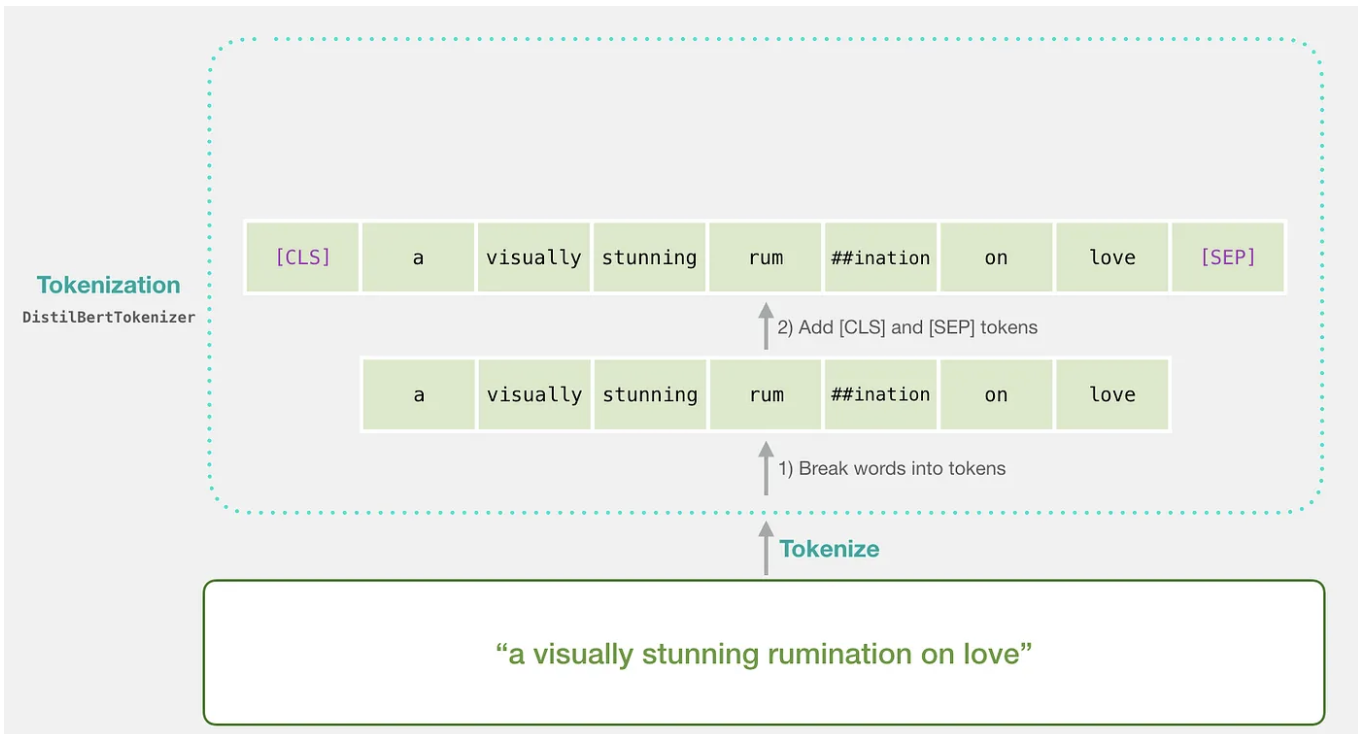



Tokenization is a foundational concept in natural language processing (NLP) that involves breaking down a sequence of text into smaller, meaningful units called tokens. These tokens can be words, subwords, or characters, depending on the tokenizer and the specific task at hand.

**Here's a breakdown of the Tokenization topic:**

- **Importance of Tokenization:** Explain why tokenization is crucial in NLP tasks. Text data is inherently unstructured, and tokenization transforms this data into a structured format that can be processed by machine learning models. It forms the basis for many downstream NLP tasks, such as text classification, named entity recognition, machine translation, and sentiment analysis.

- **Word Tokenization:**  Discuss word tokenization, where the text is split into individual words based on spaces or punctuation. For example, the sentence "Tokenization is important for NLP." would be tokenized into ["Tokenization", "is", "important", "for", "NLP", "."]. Emphasize how word tokenization is the most common form of tokenization and is suitable for many NLP tasks.

- **Subword Tokenization:** Introduce subword tokenization, which breaks down words into smaller units. Explain that this approach is useful for handling rare words, out-of-vocabulary (OOV) words, and languages with complex morphology. Discuss popular subword tokenization algorithms like Byte Pair Encoding (BPE) and WordPiece, highlighting their advantages and applications.

- **Character Tokenization:** Briefly cover character tokenization, where the text is split into individual characters. Explain that character tokenization is less common but can be useful for languages with complex scripts or for character-level models.

- **Special Tokens:** Discuss special tokens used by tokenizers, such as tokens to denote the beginning and end of a sequence, padding tokens for sequences of different lengths, and tokens to represent unknown words or masked tokens. Emphasize the importance of these special tokens in maintaining sequence integrity and handling variable-length inputs.

- **Tokenization Libraries:** Mention popular tokenization libraries and tools used in NLP, such as the Hugging Face Tokenizers library, spaCy, NLTK, and TensorFlow Text. Explain that these libraries offer pre-built tokenization functionality for various languages and tasks, making it easier for developers to tokenize text data.

- **Pre-trained Tokenizers:** Discuss pre-trained tokenizers that come with pre-trained NLP models, such as BERT, GPT, and RoBERTa. Explain that these tokenizers are trained on large text corpora and are optimized for specific tasks and languages, making them highly effective for a wide range of NLP applications.



### **BERT Tokenization using Hugging Face Transformers Library**


In [ ]:
!pip install transformers


- Load the BERT tokenizer from the Hugging Face library. This tokenizer will handle the WordPiece tokenization

In [ ]:
from transformers import BertTokenizer

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

- Use the tokenizer to tokenize a sample text. The tokenize method splits the text into subwords, while the encode method converts the tokens into their corresponding IDs.



In [ ]:
sample_text = "BERT is a powerful NLP model developed by Google."

# Tokenize the text
tokens = tokenizer.tokenize(sample_text)
print("Tokens:", tokens)

# Convert tokens to their respective IDs
token_ids = tokenizer.encode(sample_text)
print("Token IDs:", token_ids)


Tokens: ['bert', 'is', 'a', 'powerful', 'nl', '##p', 'model', 'developed', 'by', 'google', '.']
Token IDs: [101, 14324, 2003, 1037, 3928, 17953, 2361, 2944, 2764, 2011, 8224, 1012, 102]


- BERT uses special tokens to denote the start ([CLS]) and end ([SEP]) of a sequence. These tokens are added automatically when using the encode method.

In [ ]:
# Encode text with special tokens
encoded_text = tokenizer.encode(sample_text, add_special_tokens=True)
print("Encoded Text with Special Tokens:", encoded_text)

# Decode the token IDs back to text
decoded_text = tokenizer.decode(encoded_text)
print("Decoded Text:", decoded_text)


Encoded Text with Special Tokens: [101, 14324, 2003, 1037, 3928, 17953, 2361, 2944, 2764, 2011, 8224, 1012, 102]
Decoded Text: [CLS] bert is a powerful nlp model developed by google. [SEP]


- When dealing with batches of text, the sequences might have different lengths. BERT requires inputs to be of the same length, so padding and truncation are used.

In [ ]:
texts = ["BERT is great.", "It is widely used for NLP tasks."]

# Tokenize and encode the texts with padding and truncation
encoded_texts = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
print("Encoded Texts with Padding and Truncation:", encoded_texts)


Encoded Texts with Padding and Truncation: {'input_ids': tensor([[  101, 14324,  2003,  2307,  1012,   102,     0,     0,     0,     0,
             0],
        [  101,  2009,  2003,  4235,  2109,  2005, 17953,  2361,  8518,  1012,
           102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


- Tokenize a batch of texts and return them in a format suitable for model input, including input IDs and attention masks.

In [ ]:
texts = ["BERT is great.", "It is widely used for NLP tasks.", "Tokenization is important."]

# Tokenize and encode the batch of texts
encoded_batch = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
print("Batch Encoded Texts:", encoded_batch)


Batch Encoded Texts: {'input_ids': tensor([[  101, 14324,  2003,  2307,  1012,   102,     0,     0,     0,     0,
             0],
        [  101,  2009,  2003,  4235,  2109,  2005, 17953,  2361,  8518,  1012,
           102],
        [  101, 19204,  3989,  2003,  2590,  1012,   102,     0,     0,     0,
             0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])}


# **Fine-tuning BERT for Text Classification**



**This process typically includes the following steps:**

- **Load the Pre-trained BERT Model and Tokenizer:** Start with a BERT model that has been pre-trained on a large corpus (e.g., bert-base-uncased).
- **Prepare the Dataset:** Load and preprocess your dataset.
- **Tokenize the Dataset:** Use the BERT tokenizer to convert your text data into the format expected by the model.
- **Set Up the Data Loaders:** Prepare PyTorch DataLoader objects for efficient batching and shuffling of the dataset.
- **Define the Model and Training Arguments:** Set up the model and specify training parameters.
- **Train the Model:** Use the Trainer class from the Hugging Face library to handle the training loop.
- **Evaluate the Model:** After training, evaluate the model on a test set.

In [ ]:
!pip install transformers datasets torch


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from datasets import load_dataset
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
import numpy as np
import time
import datetime
import random
import matplotlib.pyplot as plt


In [ ]:
# Load IMDb dataset
dataset = load_dataset("imdb")

# Select a smaller subset for quick training (optional)
train_dataset = dataset["train"].shuffle(seed=42).select(range(1000))
test_dataset = dataset["test"].shuffle(seed=42).select(range(1000))


In [ ]:
# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenization function
def tokenize_batch(batch):
    return tokenizer(batch["text"], padding=True, truncation=True, max_length=512)

# Apply tokenization
train_dataset = train_dataset.map(tokenize_batch, batched=True)
test_dataset = test_dataset.map(tokenize_batch, batched=True)

# Convert datasets to PyTorch format
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


In [ ]:
# Create DataLoader for training set
train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=8
)

# Create DataLoader for validation set
validation_dataloader = DataLoader(
    test_dataset,
    sampler=SequentialSampler(test_dataset),
    batch_size=8
)


In [ ]:
# Define the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Function to calculate accuracy
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Training function
def train_epoch(model, dataloader, optimizer, device):
    model.train()
    total_loss = 0

    for step, batch in enumerate(dataloader):
        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['label'].to(device)

        model.zero_grad()

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(dataloader)
    return avg_train_loss

# Evaluation function
def evaluate_epoch(model, dataloader, device):
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    for batch in dataloader:
        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['label'].to(device)

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

        loss = outputs.loss
        total_eval_loss += loss.item()

        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).flatten()

        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        total_eval_accuracy += accuracy

    avg_val_accuracy = total_eval_accuracy / len(dataloader)
    avg_val_loss = total_eval_loss / len(dataloader)
    return avg_val_accuracy, avg_val_loss


# **Fine-tuning BERT for Named Entity Recognition (NER)**

Fine-tuning BERT for Named Entity Recognition (NER) involves adapting a pre-trained BERT model to identify and classify named entities in text, such as names of people, organizations, locations, etc.

In [ ]:
!pip install transformers datasets torch


**Dataset Preparation:**
- Load a dataset suitable for NER tasks. Common datasets include CoNLL-2003, OntoNotes, etc.
Split the dataset into training, validation, and test sets.

**Tokenization:**
- Tokenize the input text using the BERT tokenizer.
Encode the tokens into input IDs and attention masks.

**Model Loading:**
- Load a pre-trained BERT model with a token classification head (BertForTokenClassification) from the Hugging Face Transformers library.
- Specify the number of labels corresponding to the NER tags in your dataset.


**Training Loop:**
- Iterate through epochs and batches.
- Forward pass: Feed the input tokens through the BERT model and obtain the predicted logits for each token.
- Compute the loss using a suitable loss function (usually CrossEntropyLoss) between the predicted logits and the ground truth labels.
- Backward pass: Compute gradients and update model parameters using an optimizer (e.g., AdamW).
- Optionally, apply learning rate scheduling to adjust the learning rate during training.

In [ ]:
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForTokenClassification, AdamW, get_linear_schedule_with_warmup
from datasets import load_dataset, load_metric
import numpy as np
import time
import datetime
import random
import matplotlib.pyplot as plt


In [ ]:
# Create DataLoader for training set
train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=8
)

# Create DataLoader for validation set
val_dataloader = DataLoader(
    val_dataset,
    sampler=SequentialSampler(val_dataset),
    batch_size=8
)


In [ ]:
# Define the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Total number of training steps
total_steps = len(train_dataloader) * 3

# Define the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Function to calculate accuracy
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=2).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Training function
def train_epoch(model, dataloader, optimizer, scheduler, device):
    model.train()
    total_loss = 0

    for step, batch in enumerate(dataloader):
        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)

        model.zero_grad()

        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(dataloader)
    return avg_train_loss

# Evaluation function
def evaluate_epoch(model, dataloader, device):
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    for batch in dataloader:
        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)

        with torch.no_grad():
            outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)

        loss = outputs.loss
        total_eval_loss += loss.item()

        logits = outputs.logits
        preds = torch.argmax(logits, dim=2).cpu().numpy()
        label_ids = b_labels.cpu().numpy()

        accuracy = flat_accuracy(preds, label_ids)
        total_eval_accuracy += accuracy

    avg_val_accuracy = total_eval_accuracy / len(dataloader)
    avg_val_loss = total_eval_loss / len(dataloader)
    return avg_val_accuracy, avg_val_loss


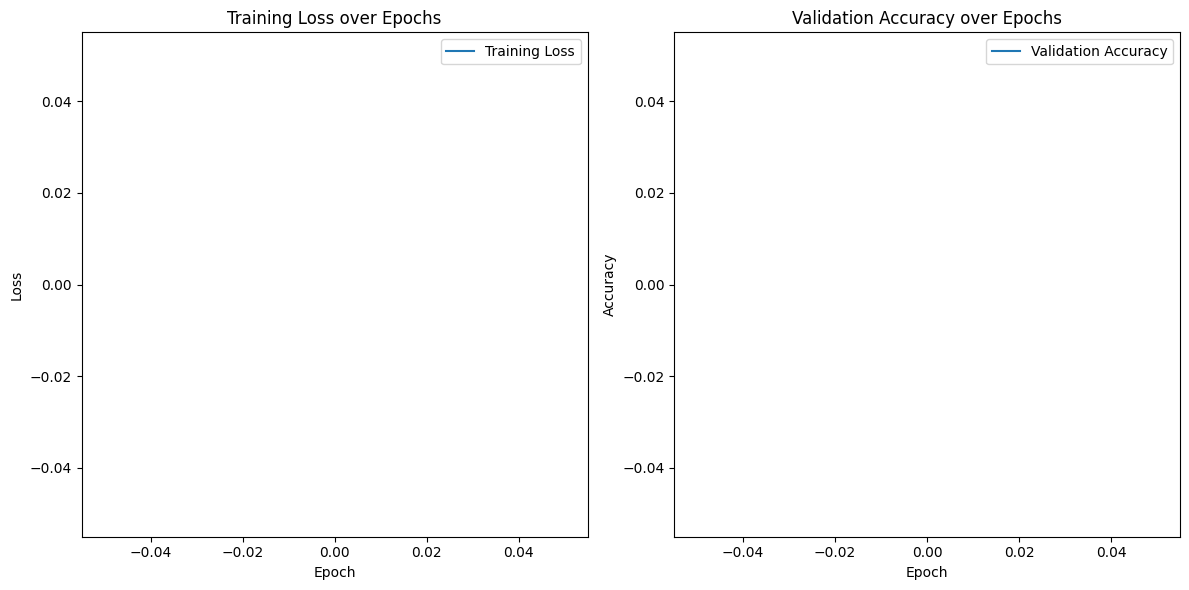

In [ ]:
# Plot training loss and evaluation accuracy
plt.figure(figsize=(12, 6))

# Training loss
plt.subplot(1, 2, 1)
plt.plot([stat['Training Loss'] for stat in training_stats], label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()

# Validation accuracy
plt.subplot(1, 2, 2)
plt.plot([stat['Validation Accuracy'] for stat in training_stats], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()


# **Fine-tuning BERT for a Question Answering (QA)**

**Fine-tuning for QA:**
- Fine-tuning leverages BERT's pre-trained knowledge for a specific task like question answering.


**Data Preparation:**
- You'll need a Question Answering dataset like SQuAD (Stanford Question Answering Dataset) containing questions, corresponding passages, and answers.
- The dataset should be formatted with separate columns for questions, passages, and answers (sometimes start and end positions of answers within the passage).

**BERT for QA Model Architecture:**
- We typically use a pre-trained BERT model like bert-base-uncased or bert-large-uncased.
- A question embedding layer converts the question text into a vector representation.
- The question embedding and passage text are fed into the BERT encoder, which utilizes attention mechanisms to understand the context of both the question and the passage.

- Depending on the specific model architecture, one or two additional layers are added on top of the BERT encoder:
- **For extractive QA:** An output layer predicts the start and end positions of the answer span within the passage.
- **For generative QA:** A decoder like a Transformer decoder might be used to generate the answer text itself.


**Fine-tuning Process:**
- The pre-trained BERT weights are loaded, and only the final layers added for the specific QA task are trained.
- This leverages the pre-trained knowledge while adapting to the question answering task.
- A loss function (often cross-entropy for classification or mean squared error for regression) is used to measure the difference between the model's predictions and the actual answers in the training data.
- An optimizer like Adam is used to update the weights of the newly added layers based on the calculated loss.


**Evaluation:**
- After training, the model is evaluated on a held-out test set from the QA dataset. Metrics like F1 score (considering both precision and recall) are used to assess the model's performance in identifying the correct answer spans or generating accurate answers.

**Libraries and Tools:**
- Popular libraries for fine-tuning BERT for QA include Transformers (from Hugging Face) and TensorFlow.
- Pre-trained BERT models and fine-tuned models for QA are often available for download from Hugging Face model hub, saving you training time.

**Benefits of Fine-tuning BERT for QA:**
- **Improved Accuracy:** Leverages BERT's pre-trained knowledge to achieve state-of-the-art performance on question answering tasks.
- **Transfer Learning:** Saves training time compared to training a model from scratch.
- **Flexibility:** Can be adapted to different QA tasks with adjustments to the model architecture and fine-tuning process.


# **BERT Variants and Extensions**

BERT (Bidirectional Encoder Representations from Transformers) has had a significant impact on natural language processing (NLP) since its introduction, inspiring a variety of variants and extensions to address different tasks and improve performance


## **BERT Variants**

#### **RoBERTa (Robustly optimized BERT approach):**
- **Description:** RoBERTa builds on BERT by modifying key hyperparameters, removing the next sentence prediction objective, and training with much larger mini-batches and learning rates.
- **Improvements:** Achieves state-of-the-art results on many NLP benchmarks.
- **Key Changes:** No next sentence prediction task, longer training with larger batches, and more data.

#### **DistilBERT:**
- **Description:** A smaller, faster, and lighter version of BERT, which retains 97% of BERT's performance while being 60% faster and 40% smaller.
- **Improvements:** Optimized for resource-constrained environments.
- **Key Changes:** Uses knowledge distillation during training.

#### **ALBERT (A Lite BERT):**
- **Description:** Focuses on parameter reduction techniques to lower memory consumption and increase the training speed.
- **Improvements:** Efficiently scales BERT to larger models.
- **Key Changes:** Factorized embedding parameterization and cross-layer parameter sharing.

#### **TinyBERT:**
- **Description:** A smaller and efficient BERT model that applies a knowledge distillation method to learn from the original BERT.
- **Improvements:** Suitable for deployment in mobile and embedded applications.
- **Key Changes:** Knowledge distillation with a layer-by-layer learning mechanism.
Electra (Efficiently Learning an Encoder that Classifies

#### **Token Replacements Accurately):**
- **Description:** Introduces a new pre-training task called replaced token detection to improve efficiency.
- **Improvements:** More sample-efficient than masked language modeling (MLM).
- **Key Changes:** Uses a generator to create corrupted input and a discriminator to detect the corrupted tokens.

#### **SpanBERT:**
- **Description:** Focuses on span-based pre-training for better performance on span-based tasks like question answering.
- **Improvements:** Outperforms BERT on span selection tasks.
- **Key Changes:** Mask contiguous random spans and train the model to predict the entire span.




##**BERT Extensions**
**BERT for Sequence Classification:**
- **Description:** Fine-tuning BERT for tasks like sentiment analysis, spam detection, etc.
- **Improvements:** Adapts BERT to tasks requiring the classification of whole sentences or sequences.
- **Key Changes:** Add a classification layer on top of BERT.

####**BERT for Named Entity Recognition (NER):**
- **Description:** Fine-tuning BERT for recognizing and classifying named entities in text.
- **Improvements:** Enhances NER performance with contextual embeddings.
- **Key Changes:** Add a token classification layer.

####**BERT for Question Answering (QA):**
- **Description:** Fine-tuning BERT for extractive question answering tasks, like SQuAD.
- **Improvements:** Excels at understanding the context to answer questions accurately.
- **Key Changes:** Predict start and end positions of the answer span.

#### **BERT for Text Generation:**
- **Description:** Modifying BERT to generate text, typically used for tasks like summarization or translation.
- **Improvements:** Better captures context for generating coherent and contextually relevant text.
- **Key Changes:** Adjust BERT's architecture to handle generative tasks.